In [5]:

%load_ext autoreload
%autoreload 2
import common.utils as utils
import pandas as pd
import seaborn as sns
import os
import common.lazy as lazy
import common.charts.validation as charts
import common.charts.shared as chartHelpers


import matplotlib.pyplot as plt

sns.set_theme()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
functionName = "go-string-reversal-validation"
benchmarkName = "go-string-reversal-validation-1"
mockBenchmarkName = "go-string-reversal-mock-validation-1"
definition = utils.getBenchmarkDefinition(functionName)

In [7]:
outputFolder = f"output/{functionName}"
if not os.path.exists(outputFolder):
  os.makedirs(outputFolder)

In [8]:
httpRequestDuration = chartHelpers.normalizeTime(lazy.getHttRequestStats(benchmarkName, "32"))
httpRequestDuration["source"] = "real"
mockHttpRequestDuration = chartHelpers.normalizeTime(lazy.getHttRequestStats(mockBenchmarkName, "32"))
mockHttpRequestDuration["source"] = "mock"
httpReqSending = chartHelpers.normalizeTime(lazy.getHttpReqSending(mockBenchmarkName, "32"))

total waterstein distance: 24902.26031176604


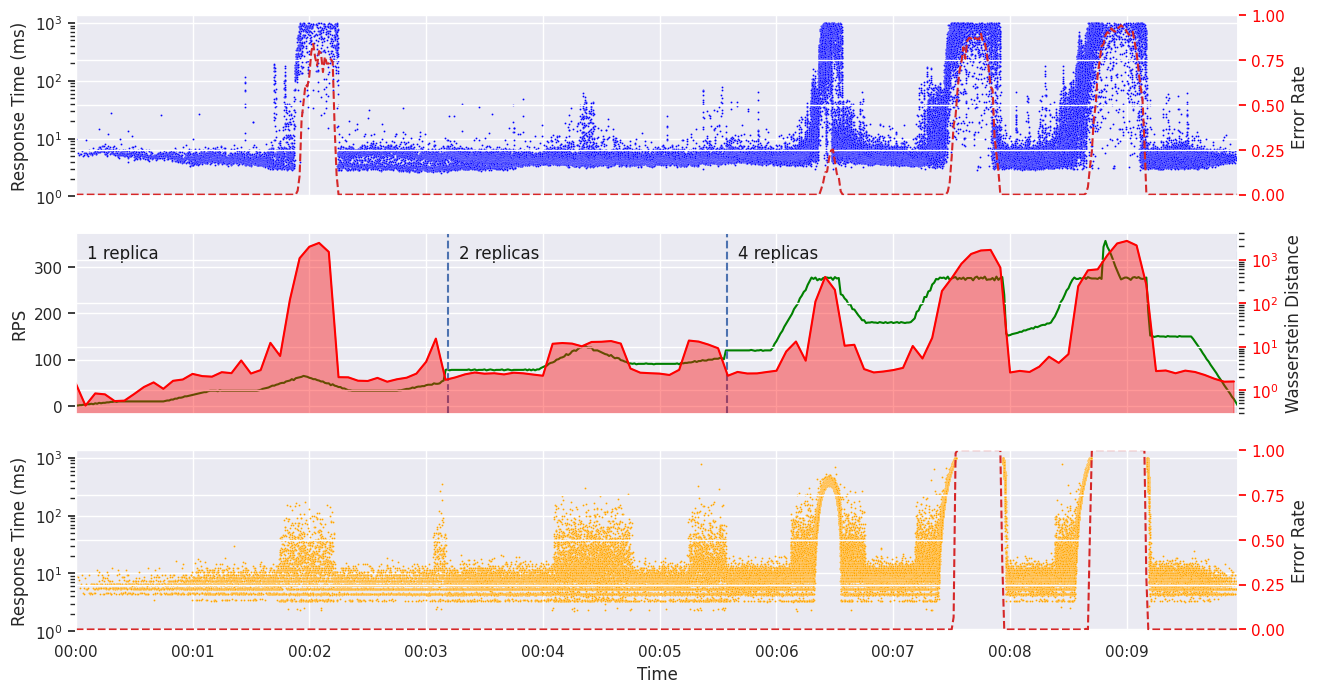

In [11]:
fig, axes = charts.validationComparisonPlot(httpRequestDuration, mockHttpRequestDuration, httpReqSending)